#  get data from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json 

DOgs vs cats

In [ ]:
!kaggle competitions download -c dogs-vs-cats
!unzip -q '/content/train.zip'


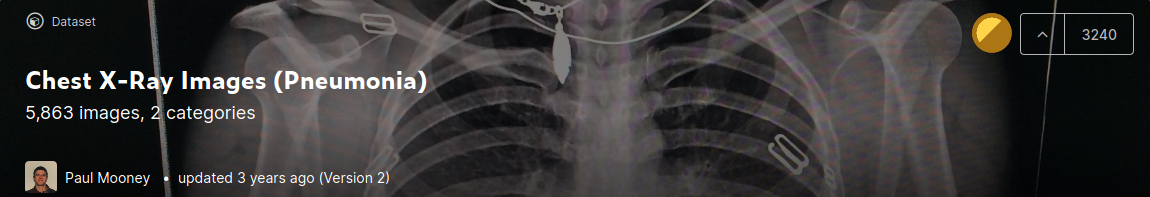

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -q '/content/chest-xray-pneumonia.zip'
data_directory = '/content/chest_xray/train'

test_data_direc = '/content/chest_xray/test'

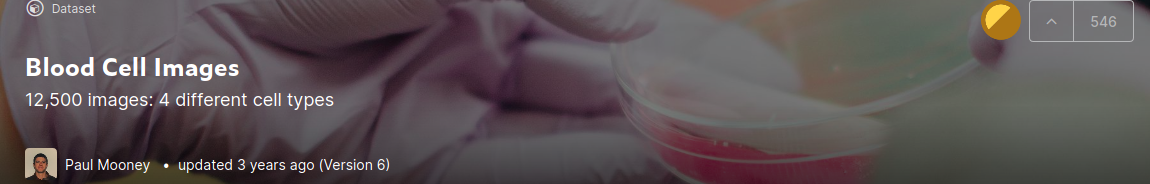

In [ ]:
!kaggle datasets download -d paultimothymooney/blood-cells

https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri



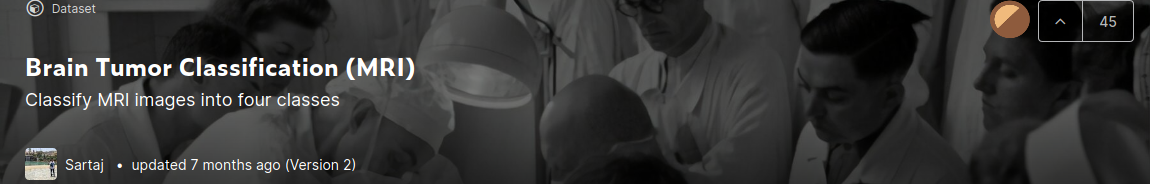

In [2]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!unzip -q '/content/brain-tumor-classification-mri.zip'


data_directory = '/content/Training'
test_data_direc = '/content/Testing'

 93% 81.0M/86.8M [00:01<00:00, 54.8MB/s]
100% 86.8M/86.8M [00:01<00:00, 81.6MB/s]


https://www.kaggle.com/kmader/food41


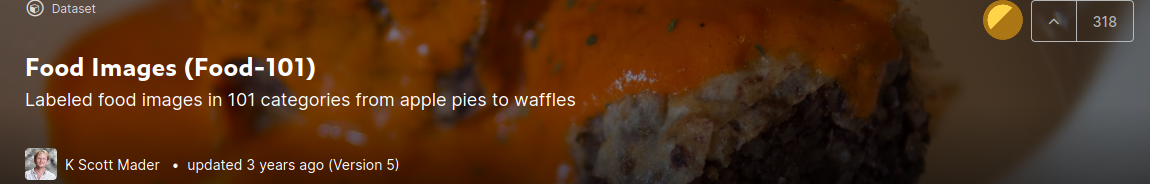

In [ ]:
!kaggle datasets download -d kmader/food41

# Classification pipeline

In [ ]:
!pip install mlxtend
!pip install cmapy

In [4]:
# from tensorflow.keras.applications.resnet import ResNet50 #ResNet152 ResNet101
# tf.config.list_physical_devices('GPU')
import numpy as np
import tensorflow as tf
import os
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import glob
import time

from tensorflow.keras import layers , backend , applications , metrics , regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average , Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten , ZeroPadding2D , Convolution2D , MaxPooling2D \
    ,Concatenate, Lambda

import random
from tensorflow.python.keras.utils import data_utils


from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications.xception import preprocess_input
import cmapy


def set_random_seed(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    print('Random_seed set for', seed_value)

###################  Seed setting  ######################################
seed_value = 10
numpy_seed_value = 2
tensorflow_seed_value = 2

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
set_random_seed(seed_value)

Num GPUs Available:  1
Random_seed set for 10


### EDA - Get into look data

In [ ]:
from glob import glob

In [ ]:
'''train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_directory, validation_split=0.2, subset="training", seed=seed_value, 
                                                               image_size=(img_size, img_size),  batch_size=batch_size, shuffle= True)

class_names = train_ds.class_names
print(class_names)

rand_number = random.randrange(1,10)
print(rand_number)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(rand_number):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")'''

In [ ]:
cmap_list    = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu',
                'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
                'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
                'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
                'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
                'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
                'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
                'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
                'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
                'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
                'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
                'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
                'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma',
                'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean']

In [ ]:

img_direc = '/content/Training/meningioma_tumor/m (101).jpg'
img_direc = '/content/Training/pituitary_tumor/p (10).jpg'

def look_sample(img_direc):

    b = 1
    fig = plt.figure()
    fig.set_figheight(30)
    fig.set_figwidth(30)

    for i in range(0,100):
        z = plt.subplot(10, 10, b)
        img = Image.open(img_direc)
        img = np.array(img)
        img = cv2.applyColorMap(img, cmapy.cmap(cmap_list[b]))
        img = img/255
        #img_final = Image.fromarray(img)

        z.set_title(cmap_list[b])
        z.set_xticklabels(())
        z.set_yticklabels(())
        plt.subplots_adjust(hspace = .001)
        plt.subplots_adjust(wspace = .001)
        plt.imshow(img)
        b += 1

    plt.show()


multiply_factor = 255

look_sample(img_direc)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
 cmap_list = ['Blues', 'Blues_r' , 'BrBG' ,'Greys_r' , 'RdGy','coolwarm_r' ]

alpha : scalar or array-like, optional
    The alpha blending value, between 0 (transparent) and 1 (opaque).
    If alpha is an array, the alpha blending values are applied pixel
    by pixel, and alpha must have the same shape as X.

In [ ]:

img_direc = ['/content/Training/glioma_tumor/gg (102).jpg' , '/content/Training/meningioma_tumor/m (101).jpg','/content/Training/pituitary_tumor/p (10).jpg']


def look_sample(img_direc):

    b = 1
    fig = plt.figure()
    fig.set_figheight(30)
    fig.set_figwidth(30)

    for i in range(0,6):
        z = plt.subplot(2, 3, b)
        img = Image.open(img_direc)
        img = np.array(img)
        img = cv2.applyColorMap(img, cmapy.cmap(cmap_list[b-1]  ))
        img = img/255
        #img_final = Image.fromarray(img)

        z.set_title(cmap_list[b-1])
        z.set_xticklabels(())
        z.set_yticklabels(())
        plt.subplots_adjust(hspace = .001)
        plt.subplots_adjust(wspace = .001)
        plt.imshow(img , alpha=0.99)
        b += 1

    plt.show()


multiply_factor = 255

for img in img_direc:
  look_sample(img)

Output hidden; open in https://colab.research.google.com to view.

### Dataset creation

In [122]:
validation_split = 0.4
rescale = 1.0 / 255.0  # 0 / 1           # Normalize Images
rotation_range = 10
width_shift_range = 0.1
zoom_range = 0.1

img_size = 224
batch_size = 32


map_type = 'magma' #'RdGy'
def cmap_function(x):
   x = x.astype("uint8")
   img = cv2.applyColorMap(x, cmapy.cmap(map_type)).astype(np.float64)
   #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
   return(img)


def custom_generate_dataset_from_directory(data_directory , img_size , batch_size , validation_split ):

    '''train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=10, width_shift_range=0.1, zoom_range=0.1,
                                       horizontal_flip=True,fill_mode='nearest', validation_split= validation_split)'''
    
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, validation_split= validation_split )#, preprocessing_function = cmap_function)  #preprocess_input)
 
    #train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split= validation_split)


    train_gen = train_datagen.flow_from_directory(directory=data_directory, target_size=(img_size , img_size),  color_mode='grayscale',
                                                  batch_size=batch_size, shuffle=True, subset='training' , seed = seed_value )
    
    #val_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split= validation_split)

    val_gen = train_datagen.flow_from_directory(directory=data_directory, target_size=(img_size , img_size), color_mode='grayscale',
                                                batch_size=batch_size, shuffle=True, subset='validation' , seed = seed_value)
    return(train_gen , val_gen)

In [123]:
data_directory = '/content/Training'

train_gen, val_gen = custom_generate_dataset_from_directory(data_directory, img_size, batch_size, validation_split)

test_steps_per_epoch = np.math.ceil(train_gen.samples / train_gen.batch_size)
valid_steps_per_epoch = np.math.ceil(val_gen.samples / val_gen.batch_size)
print(test_steps_per_epoch)
print(valid_steps_per_epoch)

Found 1724 images belonging to 4 classes.
Found 1146 images belonging to 4 classes.
54
36


In [124]:
a = train_gen.next()
'''images = a[0][:][:][:]
labels = a[1][:][:]'''

images = a[0][:][:][:,:,:,0]
labels = a[1][:][:]

print(images.shape)
print(labels.shape)

(32, 224, 224)
(32, 4)


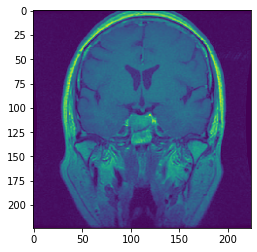

In [125]:
plt.imshow((images[10]*255).astype("uint8"))

In [126]:
class_names = train_gen.class_indices #   .class_names
print(class_names)
class_names = [(k) for k, v in class_names.items()] 
print(class_names) 

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


72


<Figure size 432x288 with 0 Axes>

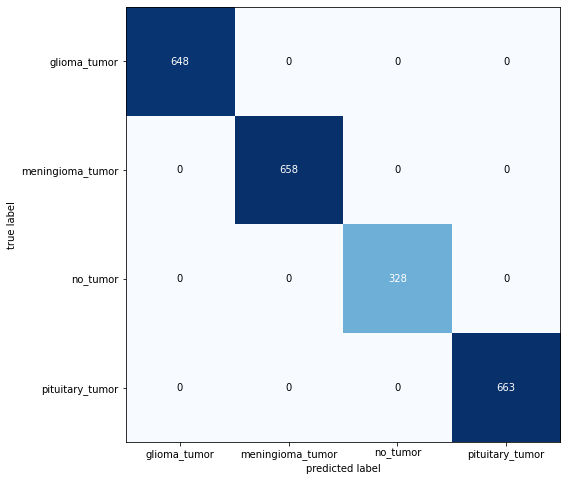

In [82]:
y_train_final = []

steps=np.math.ceil(train_gen.samples / train_gen.batch_size)
print(steps)

for i in range(steps):
  _ , y_train = train_gen.next()
  y_train = np.argmax(y_train, axis=1)
  for b in y_train:
    y_train_final.append(b)

len(y_train_final)

cm  = confusion_matrix(y_train_final, y_train_final)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(class_names)), class_names, fontsize=10)
plt.yticks(range(len(class_names)), class_names , fontsize=10)
plt.show()

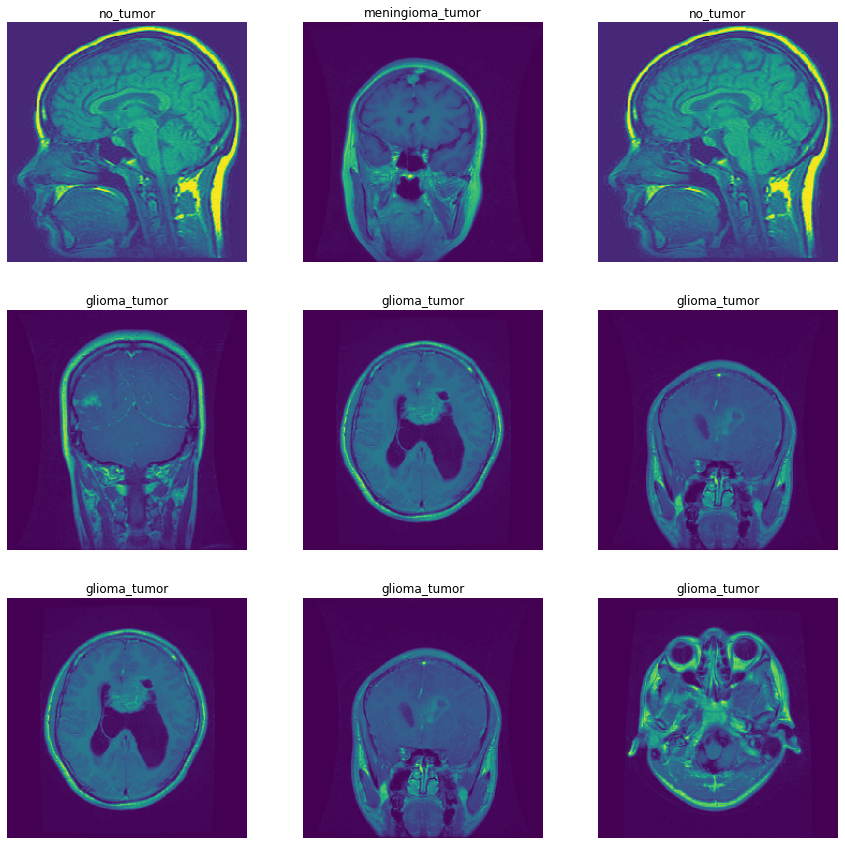

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
images = a[0][:][:][:]
labels = a[1][:][:]

for i in range(9):
    randnumber = random.randrange(1,batch_size)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images[randnumber][:,:,0]*255).astype("uint8") )#, cmap='magma')
    plt.title(class_names[np.argmax(labels[randnumber])])
    plt.axis("off")


In [127]:
def custom_original_ResNet50_base(num_classes , activation , input_shape= None):
  model_base = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape, pooling='avg')
  x = model_base.layers[-1].output
  predictions = tf.keras.layers.Dense(num_classes, activation = activation)(x)
  model = Model(inputs = model_base.input,  outputs = predictions)
  #model.summary()
  return(model)

def custom_original_Xception_base(num_classes , input_shape= None):
  model_base = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=input_shape,
                                                       pooling='avg')
  x = model_base.layers[-1].output
  predictions = Dense(num_classes, activation = "sigmoid")(x)
  model = Model(inputs = model_base.input,  outputs = predictions)
  model.summary()
  return(model)

def CBR(input_shape,classes,activation,a,b,c,d,kernel_size):
    Input = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(filters=a,kernel_size=kernel_size,padding="same", activation="relu", kernal_initilizer = 'he_uniform' )(Input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = tf.keras.layers.Conv2D(filters=b, kernel_size=kernel_size, padding="same", activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = tf.keras.layers.Conv2D(filters=c, kernel_size=kernel_size, padding="same", activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = tf.keras.layers.Conv2D(filters=d, kernel_size=kernel_size, padding="same", activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(units= classes , activation=activation)(x)

    model = tf.keras.Model(Input , x)
    #model.summary()
    return model

def CBRlarge(input_shape,classes,activation):                   #8,445,828 param
  return CBR(input_shape,classes,activation,64,128,256,512,(7,7))

def CBRtiny(input_shape,classes,activation):                    #4,312,452
  return CBR(input_shape,classes,activation,64,128,256,512,(5,5))

def CBRsmall(input_shape,classes, activation):            #2,115,524
  return CBR(input_shape,classes,activation,32,64,128,256,(7,7))


def Freeze_model(model, print = False):
    for layer in model.layers[:-51]:
        layer.trainable = False
    if print == True:
        for l in model.layers:
            print(l.name, l.trainable)


binary_classification = False

if binary_classification == True:
  num_classes = 1
  metrics = ['accuracy']   
  loss = 'binary_crossentropy'
  activation = "sigmoid"
else:
  num_classes = len(class_names)
  loss = 'categorical_crossentropy'   # # 'binary_crossentropy' , 'categorical_crossentropy'
  metrics = ['accuracy' , 'Recall' , 'Precision' , 'TruePositives']
  #metrics = ['accuracy' , 'Recall' ]
  activation = "softmax"


input_shape = (224,224,1)
classes = 4
model = CBRsmall(input_shape,classes, activation)

#model = custom_original_ResNet50_base(num_classes = num_classes , activation = activation , input_shape= (img_size,img_size,3))


#model.summary()
print()
print(num_classes , '   ' ,  activation , '  ' , loss)


4     softmax    categorical_crossentropy


In [128]:
'''

for layer in model.layers[:-54]:   #-34   conv4_block6_out False  ,     -54  conv4_block4_out False
    layer.trainable = False
    
for l in model.layers:
   print(l.name, l.trainable)
   
model.summary()
tf.keras.utils.plot_model(    model, show_shapes=True ,show_layer_names=True, show_dtype=True)'''

'\n\nfor layer in model.layers[:-54]:   #-34   conv4_block6_out False  ,     -54  conv4_block4_out False\n    layer.trainable = False\n    \nfor l in model.layers:\n   print(l.name, l.trainable)\n   \nmodel.summary()\ntf.keras.utils.plot_model(    model, show_shapes=True ,show_layer_names=True, show_dtype=True)'

In [129]:
learning_rate_list = [0.001 , 0.0005 , 0.0001 ,0.00005 , 0.00001]
learning_rate = 0.0005
epoch = 10
patience = 5


Adamoptimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=Adamoptimizer, loss= loss, metrics=metrics)

model_name = 'Resnet_' + str(batch_size) + '_' + str(learning_rate)+'_' + str(round(time.time() ,0))
print(model_name)
'''
save_checkpoint = ModelCheckpoint((model_name + ".h5"), monitor='val_accuracy', verbose=3, save_best_only=True,
                                      save_weights_only=False, mode='auto', save_freq=1)
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=patience, verbose=1, mode='auto')
'''
History = model.fit(train_gen, validation_data=val_gen, steps_per_epoch=test_steps_per_epoch,
                                  validation_steps=valid_steps_per_epoch,  epochs=epoch,)# callbacks =[early_stop] )

history_accuracy     = History.history["accuracy"]
history_val_accuracy = History.history['val_accuracy']
history_loss = History.history['loss'] 
history_val_loss = History.history['val_loss'] 

Resnet_32_0.0005_1608658616.0
Epoch 1/10
54/54 [==============================] - 16s 274ms/step - loss: 0.9981 - accuracy: 0.6390 - recall: 0.5580 - precision: 0.6955 - true_positives: 540.9636 - val_loss: 1.3854 - val_accuracy: 0.3089 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/10
54/54 [==============================] - 13s 250ms/step - loss: 0.5324 - accuracy: 0.8025 - recall: 0.7397 - precision: 0.8455 - true_positives: 667.6364 - val_loss: 1.3863 - val_accuracy: 0.3168 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 3/10
54/54 [==============================] - 13s 248ms/step - loss: 0.3866 - accuracy: 0.8546 - recall: 0.8343 - precision: 0.8773 - true_positives: 743.4545 - val_loss: 1.3735 - val_accuracy: 0.3421 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 4/10
54/54 [==============================] - 13s 249ms/step - loss: 0.2723 - accurac

In [ ]:
Total_history = History.history

In [ ]:
print(Total_history)

In [ ]:
Total_history = [(k,v) for k, v in History.history.items()] 
print(Total_history[0]) 

In [ ]:
len(new_history)

10

In [ ]:
for a in History.history:
  print(a)

loss
accuracy
recall
precision
true_positives
val_loss
val_accuracy
val_recall
val_precision
val_true_positives


In [ ]:
new_history = [(k,v) for k, v in History.history.items()] 

#History = []
for a in range(len(new_history)):
  print(Total_history[a][1] , history[a][1] )



In [130]:
history_accuracy     = History.history["accuracy"]
history_val_accuracy = History.history['val_accuracy']
history_loss = History.history['loss'] 
history_val_loss = History.history['val_loss'] 

In [101]:
'''for layer in model.layers[:-34]:   # Resnet >>>> -34   conv4_block6_out False  ,     -54  conv4_block4_out False
    layer.trainable = False

for l in model.layers:
   print(l.name, l.trainable)
   
#model.summary()
#tf.keras.utils.plot_model(    model, show_shapes=True ,show_layer_names=True, show_dtype=True)
'''

'for layer in model.layers[:-34]:   # Resnet >>>> -34   conv4_block6_out False  ,     -54  conv4_block4_out False\n    layer.trainable = False\n\nfor l in model.layers:\n   print(l.name, l.trainable)\n   \n#model.summary()\n#tf.keras.utils.plot_model(    model, show_shapes=True ,show_layer_names=True, show_dtype=True)\n'

In [131]:
learning_rate = 0.00001
epoch = 10
History = model.fit(train_gen, validation_data=val_gen, steps_per_epoch=test_steps_per_epoch,
                                  validation_steps=valid_steps_per_epoch,  epochs=epoch )

history_accuracy     += History.history["accuracy"]
history_val_accuracy += History.history['val_accuracy']
history_loss         += History.history['loss'] 
history_val_loss     += History.history['val_loss'] 

Epoch 1/10
54/54 [==============================] - 14s 253ms/step - loss: 0.0903 - accuracy: 0.9751 - recall: 0.9722 - precision: 0.9767 - true_positives: 1676.0000 - val_loss: 1.0197 - val_accuracy: 0.5716 - val_recall: 0.4058 - val_precision: 0.6577 - val_true_positives: 465.0000
Epoch 2/10
54/54 [==============================] - 13s 249ms/step - loss: 0.0831 - accuracy: 0.9774 - recall: 0.9768 - precision: 0.9785 - true_positives: 1684.0000 - val_loss: 0.5186 - val_accuracy: 0.8010 - val_recall: 0.7574 - val_precision: 0.8267 - val_true_positives: 868.0000
Epoch 3/10
54/54 [==============================] - 13s 249ms/step - loss: 0.0586 - accuracy: 0.9832 - recall: 0.9814 - precision: 0.9837 - true_positives: 1692.0000 - val_loss: 0.5779 - val_accuracy: 0.7784 - val_recall: 0.7548 - val_precision: 0.7965 - val_true_positives: 865.0000
Epoch 4/10
54/54 [==============================] - 13s 250ms/step - loss: 0.0602 - accuracy: 0.9855 - recall: 0.9838 - precision: 0.9860 - true_pos

In [132]:
learning_rate = 0.000005
epoch = 10
History = model.fit(train_gen, validation_data=val_gen, steps_per_epoch=test_steps_per_epoch,
                                  validation_steps=valid_steps_per_epoch,  epochs=epoch )

history_accuracy     += History.history["accuracy"]
history_val_accuracy += History.history['val_accuracy']
history_loss         += History.history['loss'] 
history_val_loss     += History.history['val_loss'] 

Epoch 1/10
54/54 [==============================] - 14s 252ms/step - loss: 0.0129 - accuracy: 0.9983 - recall: 0.9983 - precision: 0.9983 - true_positives: 1721.0000 - val_loss: 0.4635 - val_accuracy: 0.8438 - val_recall: 0.8386 - val_precision: 0.8482 - val_true_positives: 961.0000
Epoch 2/10
54/54 [==============================] - 13s 250ms/step - loss: 0.0114 - accuracy: 0.9971 - recall: 0.9971 - precision: 0.9971 - true_positives: 1719.0000 - val_loss: 0.5437 - val_accuracy: 0.8438 - val_recall: 0.8377 - val_precision: 0.8481 - val_true_positives: 960.0000
Epoch 3/10
54/54 [==============================] - 13s 250ms/step - loss: 0.0101 - accuracy: 0.9988 - recall: 0.9988 - precision: 0.9988 - true_positives: 1722.0000 - val_loss: 0.6742 - val_accuracy: 0.8054 - val_recall: 0.8010 - val_precision: 0.8117 - val_true_positives: 918.0000
Epoch 4/10
54/54 [==============================] - 14s 251ms/step - loss: 0.0079 - accuracy: 0.9994 - recall: 0.9994 - precision: 0.9994 - true_pos

In [133]:
learning_rate = 0.00005
epoch = 10
History = model.fit(train_gen, validation_data=val_gen, steps_per_epoch=test_steps_per_epoch,
                                  validation_steps=valid_steps_per_epoch,  epochs=epoch )

history_accuracy     += History.history["accuracy"]
history_val_accuracy += History.history['val_accuracy']
history_loss         += History.history['loss'] 
history_val_loss     += History.history['val_loss'] 

Epoch 1/10
54/54 [==============================] - 14s 254ms/step - loss: 0.0020 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_positives: 1724.0000 - val_loss: 0.5839 - val_accuracy: 0.8517 - val_recall: 0.8464 - val_precision: 0.8599 - val_true_positives: 970.0000
Epoch 2/10
54/54 [==============================] - 14s 253ms/step - loss: 0.0014 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_positives: 1724.0000 - val_loss: 0.5425 - val_accuracy: 0.8543 - val_recall: 0.8543 - val_precision: 0.8588 - val_true_positives: 979.0000
Epoch 3/10
54/54 [==============================] - 14s 254ms/step - loss: 0.0013 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_positives: 1724.0000 - val_loss: 0.5871 - val_accuracy: 0.8578 - val_recall: 0.8569 - val_precision: 0.8629 - val_true_positives: 982.0000
Epoch 4/10
54/54 [==============================] - 14s 254ms/step - loss: 0.0011 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_pos

In [136]:
learning_rate = 0.000001
epoch = 20
History = model.fit(train_gen, validation_data=val_gen, steps_per_epoch=test_steps_per_epoch,
                                  validation_steps=valid_steps_per_epoch,  epochs=epoch )

history_accuracy     += History.history["accuracy"]
history_val_accuracy += History.history['val_accuracy']
history_loss         += History.history['loss'] 
history_val_loss     += History.history['val_loss'] 

Epoch 1/20
54/54 [==============================] - 14s 256ms/step - loss: 6.3415e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_positives: 1724.0000 - val_loss: 0.6061 - val_accuracy: 0.8482 - val_recall: 0.8447 - val_precision: 0.8559 - val_true_positives: 968.0000
Epoch 2/20
54/54 [==============================] - 14s 252ms/step - loss: 4.6111e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_positives: 1724.0000 - val_loss: 0.6482 - val_accuracy: 0.8455 - val_recall: 0.8421 - val_precision: 0.8555 - val_true_positives: 965.0000
Epoch 3/20
54/54 [==============================] - 14s 252ms/step - loss: 5.6537e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - true_positives: 1724.0000 - val_loss: 0.6424 - val_accuracy: 0.8421 - val_recall: 0.8394 - val_precision: 0.8453 - val_true_positives: 962.0000
Epoch 4/20
54/54 [==============================] - 14s 254ms/step - loss: 0.0015 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.000

In [ ]:
'''for layer in model.layers:   #-34   conv4_block6_out False  ,     -54  conv4_block4_out False
    layer.trainable = True

for layer in model.layers[:-22]:   #-34   conv4_block6_out False  ,     -54  conv4_block4_out False
    layer.trainable = False
    
for l in model.layers:
   print(l.name, l.trainable)
   
#model.summary()
#tf.keras.utils.plot_model(    model, show_shapes=True ,show_layer_names=True, show_dtype=True)'''

In [ ]:
learning_rate = 0.00001
epoch = 5
History = model.fit(train_gen, validation_data=val_gen, steps_per_epoch=test_steps_per_epoch,
                                  validation_steps=valid_steps_per_epoch,  epochs=epoch )


Total_history += History

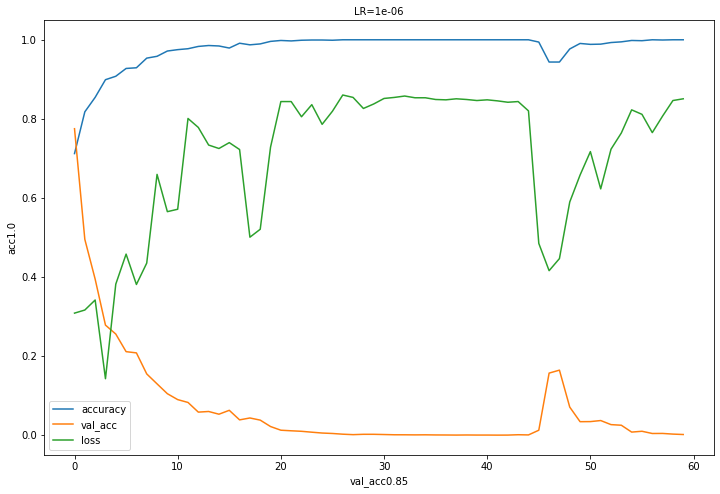

In [139]:
plt.figure(figsize=(12, 8) , )

plt.plot(history_accuracy, label='train accuracy')
plt.plot(history_loss , label='loss')
plt.plot(history_val_accuracy, label='Val accuracy')
#plt.plot(history_val_loss , label='val_loss')
plt.title('LR=' + str(learning_rate), pad=5 ,  fontsize = 10)
plt.ylabel('acc' + str(round(History.history['accuracy'][-1], 2)) ,   fontsize = 10)
plt.xlabel('val_acc' + str(round(History.history['val_accuracy'][-1], 2)) , fontsize = 10)
plt.legend(('accuracy' , 'val_acc' ,'loss' , 'val_loss') , title_fontsize = 10)

plt.savefig(model_name + '.png')
plt.show()

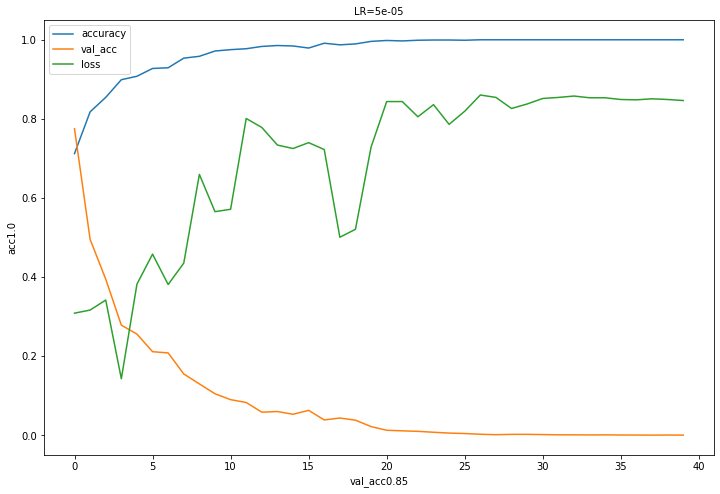

In [134]:
plt.figure(figsize=(12, 8) , )

plt.plot(history_accuracy, label='train accuracy')
plt.plot(history_loss , label='loss')
plt.plot(history_val_accuracy, label='Val accuracy')
#plt.plot(history_val_loss , label='val_loss')
plt.title('LR=' + str(learning_rate), pad=5 ,  fontsize = 10)
plt.ylabel('acc' + str(round(History.history['accuracy'][-1], 2)) ,   fontsize = 10)
plt.xlabel('val_acc' + str(round(History.history['val_accuracy'][-1], 2)) , fontsize = 10)
plt.legend(('accuracy' , 'val_acc' ,'loss' , 'val_loss') , title_fontsize = 10)

plt.savefig(model_name + '.png')
plt.show()

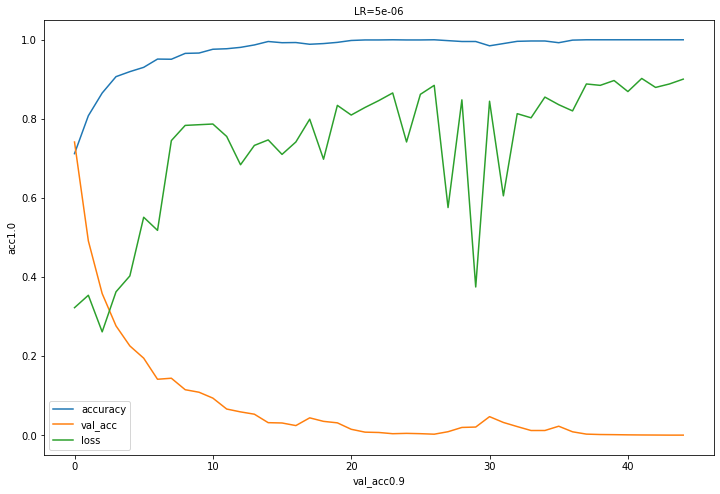

In [121]:
plt.figure(figsize=(12, 8) , )

plt.plot(history_accuracy, label='train accuracy')
plt.plot(history_loss , label='loss')
plt.plot(history_val_accuracy, label='Val accuracy')
#plt.plot(history_val_loss , label='val_loss')
plt.title('LR=' + str(learning_rate), pad=5 ,  fontsize = 10)
plt.ylabel('acc' + str(round(History.history['accuracy'][-1], 2)) ,   fontsize = 10)
plt.xlabel('val_acc' + str(round(History.history['val_accuracy'][-1], 2)) , fontsize = 10)
plt.legend(('accuracy' , 'val_acc' ,'loss' , 'val_loss') , title_fontsize = 10)

plt.savefig(model_name + '.png')
plt.show()

### Testing model

In [140]:
from sklearn.metrics import classification_report

In [145]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0 )

data_directory = '/content/Training'
test_data_direc = '/content/Testing'
test_gen = test_datagen.flow_from_directory(directory=test_data_direc, target_size=(img_size , img_size),color_mode='grayscale',
                                                  batch_size=batch_size, shuffle=True)

Found 394 images belonging to 4 classes.


In [146]:
#model = tf.keras.models.load_model('/content/pneumonia-Xray_2_class')

In [147]:
x_test , y_test = test_gen.next()
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred  

array([2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2,
       2, 2, 2, 1, 2, 3, 2, 1, 2, 2])

13
              precision    recall  f1-score   support

           0       0.91      0.22      0.36        94
           1       0.75      0.62      0.68       120
           2       0.48      0.99      0.65       105
           3       0.79      0.59      0.67        75

    accuracy                           0.62       394
   macro avg       0.73      0.60      0.59       394
weighted avg       0.72      0.62      0.59       394

[[ 21  21  46   6]
 [  2  74  38   6]
 [  0   1 104   0]
 [  0   3  28  44]]


<Figure size 432x288 with 0 Axes>

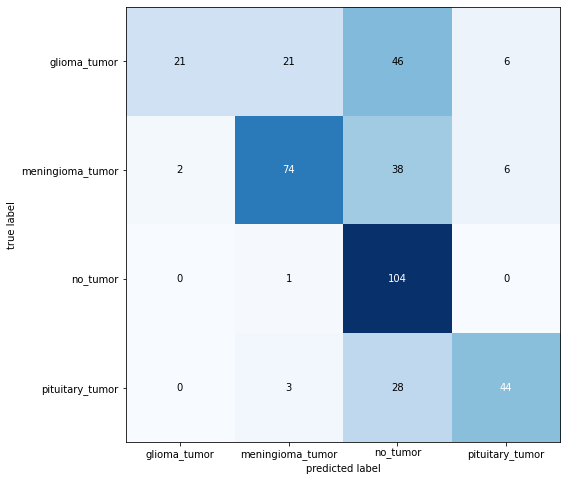

In [148]:
y_pred_bool_final =[]
y_test_final = []

steps=np.math.ceil(test_gen.samples / test_gen.batch_size)
print(steps)

for i in range(steps):
  x_test , y_test = test_gen.next()
  y_pred = model.predict(x_test)
  y_pred_bool = np.argmax(y_pred, axis=1)

  #print(type(y_pred_bool))
  #print(type(y_test))

  for a in y_pred_bool:
    y_pred_bool_final.append(a)
  for b in y_test:
    y_test_final.append(b)

  len(y_pred_bool_final)
len(y_test_final)

y_test_final = np.argmax(y_test_final, axis=1)

print(classification_report(y_test_final, y_pred_bool_final))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm  = confusion_matrix(y_test_final, y_pred_bool_final)
print(cm)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(class_names)), class_names, fontsize=10)
plt.yticks(range(len(class_names)), class_names , fontsize=10)
plt.show()

In [149]:
pneumonia_model = model.save('Brain_tumor_cbr_small_85.5_black_and_white')

INFO:tensorflow:Assets written to: Brain_tumor_cbr_small_85.5_black_and_white/assets


In [150]:
!zip -r 'Brain_tumor_cbr_small_85.5_black_and_white.zip' '/content/Brain_tumor_cbr_small_85.5_black_and_white/' 

  adding: content/Brain_tumor_cbr_small_85.5_black_and_white/ (stored 0%)
  adding: content/Brain_tumor_cbr_small_85.5_black_and_white/assets/ (stored 0%)
  adding: content/Brain_tumor_cbr_small_85.5_black_and_white/variables/ (stored 0%)
  adding: content/Brain_tumor_cbr_small_85.5_black_and_white/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/Brain_tumor_cbr_small_85.5_black_and_white/variables/variables.index (deflated 71%)
  adding: content/Brain_tumor_cbr_small_85.5_black_and_white/saved_model.pb (deflated 91%)


In [ ]:

'''for i in range(0, 3):
    plot_no = 420 + (i + 1)
    plt.subplot(plot_no )
    if i == 0:

    if i == 1:
        model = custom_InceptionV3_base(num_classes, input_shape=(img_size, img_size, 3))

    train_test_model(model, data_directory, epoch, rescale, img_size, batch_size, learning_rate, patience,
                     validation_split)
    model_name = gen_model_name('model_name', batch_size, learning_rate)
    model_name = model_name + str(time.time())

plt.savefig(save_location + '/' + model_name + '.png')
plt.show()'''


### Looking into predictions

https://www.tensorflow.org/tutorials/keras/classification#verify_predictions

In [ ]:
predictions =   y_pred_bool_final
test_labels = y_test_final
test_images = x_test_final

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels[i])
plt.tight_layout()
plt.show()


# version 1

In [ ]:
import numpy as np
import argparse
import imutils
import cv2
import time
import os
import glob
from PIL import ImageTk, Image
import tensorflow as tf

from matplotlib.pyplot import imshow
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image 
from tensorflow.python.keras.utils import data_utils
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras


def set_random_seed(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    print('Random_seed set for' , seed_value)

In [ ]:
###################  Seed setting  ######################################
seed_value = 10
numpy_seed_value = 2
tensorflow_seed_value = 2

###################  Filter visualisation ##################################
cmap_type_list = [ 'viridis' , 'gray', 'RdBu' , 'Blues']
cmap_type = cmap_type_list[0]

###################  GRADCAM visualisation ##################################
if model_architecture == 'inception':
    img_size = 299
    layer_index_list = [-14, -19, -94, -126, -158]
    layer_index = layer_index_list[0]

if model_architecture == 'resnet':
    layer_index_list = [-6, -38, -110, -142]
    layer_index = layer_index_list[0]
    img_size = 224

intensity = 0.9
gradcam_save_res = 250


/content


In [ ]:
from tensorflow.python.keras.utils import data_utils
import json

def Sort_Tuple(tup):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    tup.sort(key=lambda x: x[1] , reverse= True)
    return tup


In [ ]:
from tensorflow.python.keras.utils import data_utils
import json

def Sort_Tuple(tup):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    tup.sort(key=lambda x: x[1] , reverse= True)
    return tup


def decode_predictions_for_custom_model(preds, top=9):
  global CLASS_INDEX
  CLASS_INDEX = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9']

  results = []
  print(preds)   #[[0.1120417  0.11041853 0.1125875  0.11015146 0.11088967 0.1108565  0.11060815 0.11107314 0.11137333]]
  for pred in preds:
     #print(pred)  # [0.1120417  0.11041853 0.1125875  0.11015146 0.11088967 0.1108565 0.11060815 0.11107314 0.11137333]
     top_indices = pred.argsort()[-top:][::-1]
     print(top_indices)
     for i in top_indices:
        result = [CLASS_INDEX[i] , pred[i]]
        #result = [ (pred[i])]
        results.append(result)
        #print(results)
     results = Sort_Tuple(results)
  return results


CLASS_INDEX = None
fpath = 'my_imagenet_class_index.json'

def decode_predictions_custom(preds, num_classes ,fpath,  top=5):
  global CLASS_INDEX
  if len(preds.shape) != 2 or preds.shape[1] != num_classes:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples,',num_classes ,' )). '
                     'Found array with shape: ' + str(preds.shape))
  if CLASS_INDEX is None:
    with open(fpath) as f:
      CLASS_INDEX = json.load(f)
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

In [ ]:

num_classes = 1000


def gradCAM(image_directory, model1,  intensity=intensity, gradcam_save_res=gradcam_save_res):
    '''img_size = 299
    layer_index_list = [-14, -21, -95, -127, -159]
    layer_index = layer_index_list[0]
    model = custom_original_InceptionV3_base(num_classes=num_classes, input_shape=(img_size, img_size, 3))
    '''

    layer_index_list = [-6, -38, -110, -142]
    layer_index = layer_index_list[0]


    img_size = 224
    model = custom_original_ResNet50_base(num_classes=num_classes, input_shape=(img_size, img_size, 3))
    Freeze_model(model)



    img = image.load_img(image_directory, target_size=(img_size, img_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.inception_v3.preprocess_input(x)  # preprocess_input
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255.0, offset=-1)(x)  # rescale

    # x = preprocess_input(x)
    preds = model.predict(x)

    #label = decode_predictions(preds,  num_classes , fpath)[0][0][1] # prints the class of image
    results = tf.keras.applications.imagenet_utils.decode_predictions(preds, 5)
    print('amrit' , results)
    #results = decode_predictions_custom(preds,  num_classes , fpath)

    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(index=layer_index)
        print(last_conv_layer.name)
        label = model_architecture + ' ' + str(last_conv_layer.name) + ' ' + str(layer_index)
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    #print(heatmap.shape)
    heatmap_shape = heatmap.shape[1]
    heatmap = heatmap.reshape((heatmap_shape, heatmap_shape))

    img = cv2.imread(image_directory)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlapped_img = heatmap * intensity + img

    #stacked_output_image = np.vstack([img, heatmap, overlapped_img])
    stacked_output_image1 = np.vstack([img, heatmap, overlapped_img])
    #print('stacked_output_image1',stacked_output_image1.shape)

    return (stacked_output_image1 , resized_overlapped_img , results)

In [ ]:

num_classes = 1000

img_size = 224

model = custom_original_ResNet50_base(num_classes=num_classes, input_shape=(img_size, img_size, 3))
Freeze_model(model)


def gradCAM_model(image_directory, model1,  intensity=intensity, gradcam_save_res=gradcam_save_res):

    img = image.load_img(image_directory, target_size=(img_size, img_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.inception_v3.preprocess_input(x)  # preprocess_input
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255.0, offset=-1)(x)  # rescale

    preds = model1.predict(x)
    results = tf.keras.applications.imagenet_utils.decode_predictions(preds, 5)

    layer_index_list = [-6, -38, -110, -142]
    layer_index = layer_index_list[0]

    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(index=layer_index)
        print(last_conv_layer.name)
        label = model_architecture + ' ' + str(last_conv_layer.name) + ' ' + str(layer_index)
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap_shape = heatmap.shape[1]
    heatmap = heatmap.reshape((heatmap_shape, heatmap_shape))

    img = cv2.imread(image_directory)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlapped_img = heatmap * intensity + img

    stacked_output_image = np.vstack([img, heatmap, overlapped_img])

    return (stacked_output_image)

In [ ]:
photo = '/content/index.jpeg'
layer_index = 100
img_size = 244
model_architecture =  'resnet'
intensity = 0.9
gradcam_save_res=250
num_classes = 1000

stacked_output_image = gradCAM(photo, model , intensity=0.9, gradcam_save_res=250)
print(label)

imshow(stacked_output_image)

#  Version 2

https://github.com/lazyprogrammer/machine_learning_examples/blob/ce468b7348dd2774494b727d05ab176741d42ed0/cnn_class2/class_activation_maps.py

In [151]:
from __future__ import print_function, division
from builtins import range, input

from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from glob import glob

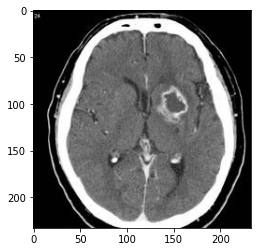

In [152]:
image_files = glob('/content/Testing/*/*.jpg')
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
model.summary()

In [166]:
#resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)  ## add preprocessing layer to the front of VGG
activation_layer = model.get_layer('batch_normalization_19')  # make a model to get output before flatten
model_new = Model(inputs=model.input, outputs=activation_layer.output)       # create a model object
final_dense = model.get_layer('dense_4')  # get the feature map weights
W = final_dense.get_weights()[0]

In [175]:
print(class_names)

from tensorflow.python.keras.utils import data_utils
import json

def Sort_Tuple(tup):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    tup.sort(key=lambda x: x[1] , reverse= True)
    return tup


def decode_predictions_for_custom_model(preds, top=4):
  global CLASS_INDEX
  CLASS_INDEX = class_names

  results = []

  #print(preds)   #[[0.1120417  0.11041853 0.1125875  0.11015146 0.11088967 0.1108565  0.11060815 0.11107314 0.11137333]]
  for pred in preds:
     #print(pred)  # [0.1120417  0.11041853 0.1125875  0.11015146 0.11088967 0.1108565 0.11060815 0.11107314 0.11137333]
     top_indices = pred.argsort()[-top:][::-1]
     #print(top_indices)
     for i in top_indices:
        result = [CLASS_INDEX[i] , pred[i]]
        #result = [ (pred[i])]
        results.append(result)
        #print(results)
     results = Sort_Tuple(results)
  return results

def cmap_function(x):
   x = x.astype("uint8")
   img = cv2.applyColorMap(x, cmapy.cmap(map_type)).astype(np.float64)
   return(img)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
print(class_names)

while True:
  file = np.random.choice(image_files)
  img = image.load_img(file, target_size=(224, 224))
  print(file)
  x = cmap_function(x)
  x = preprocess_input(np.expand_dims(img, 0))
  fmaps = model.predict(x)[0] # 7 x 7 x 2048

  # get predicted class
  probs = resnet.predict(x)
  #classnames = decode_predictions(probs)[0]
  classnames = decode_predictions_for_custom_model(probs)[0]
  print(classnames[0][0])
  classname = classnames[0][1]
  pred = np.argmax(probs[0])

  # get the 2048 weights for the relevant class
  w = W[:, pred]

  # "dot" w with fmaps
  cam = fmaps.dot(w)

  # upsample to 224 x 224
  # 7 x 32 = 224
  cam = sp.ndimage.zoom(cam, (32, 32), order=1)

  plt.subplot(1,2,1)
  plt.imshow(img, alpha=0.99)
  plt.imshow(cam, cmap='jet', alpha=0.99)
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title(classname)
  plt.show()

  ans = input("Continue? (Y/n)")
  
  if ans and ans[0].lower() == 'n':
    break

# def slowversion(A, w):
#   N = len(w)
#   result = np.zeros(A.shape[:-1])
#   for i in range(N):
#     result += A[:,:,i]*w[i]
#   return result

In [ ]:
print(class_names)


condition = True
file = np.random.choice(image_files)
print(file)

for neuron_num in range(0,4):
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)
  img = image.load_img(file, target_size=(224, 224) , color_mode='grayscale')
  
  #img = cmap_function(np.asarray(img))
  x = preprocess_input(np.expand_dims(img, 0))
  fmaps = model_new.predict(x)[0] # 7 x 7 x 2048

  # get predicted class
  probs = model.predict(x)
  #classnames = decode_predictions(probs)[0]
  classnames = decode_predictions_for_custom_model(probs)[0]
  print(classnames[0])
  classname = classnames[0][1]
  pred = np.argmax(probs[0])

  # get the 2048 weights for the relevant class
  w = W[:, neuron_num]

  # "dot" w with fmaps
  cam = fmaps.dot(w)

  # upsample to 224 x 224
  # 7 x 32 = 224
  divi = 224/27
  cam = sp.ndimage.zoom(cam, (divi, divi), order=1)

  plt.subplot(1,2,1)
  plt.imshow(img, alpha=0.8)
  plt.imshow(cam, cmap='jet', alpha=0.7)
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title(classname)
  plt.show()

  condition = False

  '''ans = input("Continue? (Y/n)")
  
  if ans and ans[0].lower() == 'n':
    break'''

# def slowversion(A, w):
#   N = len(w)
#   result = np.zeros(A.shape[:-1])
#   for i in range(N):
#     result += A[:,:,i]*w[i]
#   return result

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
/content/Testing/meningioma_tumor/image(46).jpg


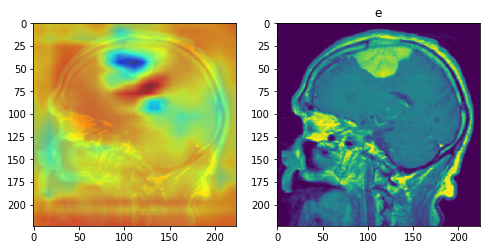

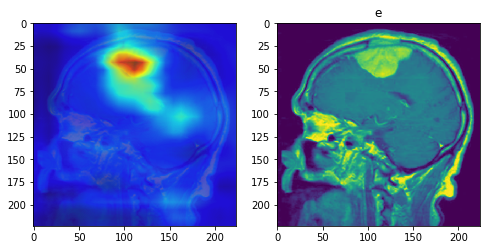

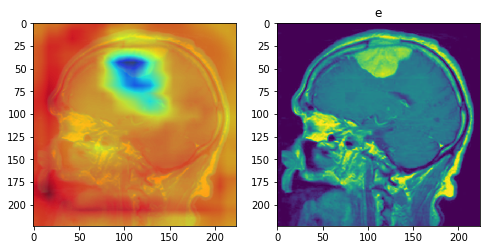

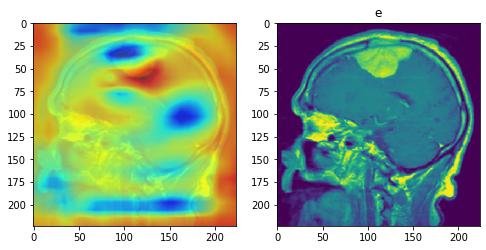

meningioma_tumor


'ans = input("Continue? (Y/n)")\n  if ans and ans[0].lower() == \'n\':\n    break'

In [184]:
print(class_names)


condition = True
file = np.random.choice(image_files)
file = '/content/Testing/meningioma_tumor/image(46).jpg'
print(file)

for neuron_num in range(0,4):
  fig = plt.figure()
  fig.set_figheight(8)
  fig.set_figwidth(8)
  img = image.load_img(file, target_size=(224, 224) , color_mode='grayscale')
  
  #img = cmap_function(np.asarray(img))
  x = preprocess_input(np.expand_dims(img, 0))
  fmaps = model_new.predict(x)[0] # 7 x 7 x 2048

  # get predicted class
  probs = model.predict(x)
  #classnames = decode_predictions(probs)[0]
  classnames = decode_predictions_for_custom_model(probs)[0]
  #print(classnames[0])
  classname = classnames[0][1]
  pred = np.argmax(probs[0])

  # get the 2048 weights for the relevant class
  w = W[:, neuron_num]

  # "dot" w with fmaps
  cam = fmaps.dot(w)

  # upsample to 224 x 224
  # 7 x 32 = 224
  divi = 224/27
  cam = sp.ndimage.zoom(cam, (divi, divi), order=1)

  plt.subplot(1,2,1)
  plt.imshow(img, alpha=0.8)
  plt.imshow(cam, cmap='jet', alpha=0.7)
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title(classname)
  plt.show()

  condition = False

print(classnames[0])

'''ans = input("Continue? (Y/n)")
  if ans and ans[0].lower() == 'n':
    break'''

# def slowversion(A, w):
#   N = len(w)
#   result = np.zeros(A.shape[:-1])
#   for i in range(N):
#     result += A[:,:,i]*w[i]
#   return result